importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.impute import SimpleImputer
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import metrics

## Lendo e chegando os dados

In [2]:
# lendo o arquivo onde tem os valores das casas.
df_sample=pd.read_csv('sample_submission.csv')

df_sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [3]:
# lendo o arquivo train, colocando
df_train=pd.read_csv('train.csv', index_col='Id')

df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Para saber quantas linhas e colinas possuem no dataset.
df_train.shape

(1460, 80)

In [6]:
#Dropando as colunas abaixo, pois não apresentam nenhuma relevancia para prever os valores das casas.
df_train.drop(['MiscFeature','PoolQC', 'Alley', 'Fence', 'PoolArea'], axis = 1, inplace = True )

In [7]:
# Saber mais infromações das colunas, comom tipo, se possui valores nulos e quantos.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [8]:
# Para otimizar a memória, mudei todos os tipos para categórico, reduzindo o uso da memoria de 866.9KB para 492.1KB.
df_train.astype('category').info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
LotFrontage      1201 non-null category
LotArea          1460 non-null category
Street           1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null category
YearBuilt        1460 non-null category
YearRemodAdd     1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null category
Exterior2nd  

Para aplicar algumas análises usando machine learnig é necessário retirar os valores nan, por isso com a função fillna, substitui tudos os nan por zero.

In [9]:
# Substituindo tudos os nan por zero.
df_train.fillna(0)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,30,0,320,0,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,57,0,0,0,0,8,2007,WD,Normal,307000
8,60,RL,0.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,204,228,0,0,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,205,0,0,0,4,2008,WD,Abnorml,129900


In [10]:
# Para saber quantas linhas e colinas possuem no dataset, após o drop.
df_train.shape

(1460, 75)

In [11]:
# Para saber a quantidades de valores nulos no dataset.
df_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

O Gráfico abaixo mostra a correlação entre as colunas do dataset, onde os quadradinhos mais claros apresentam maior correlação.

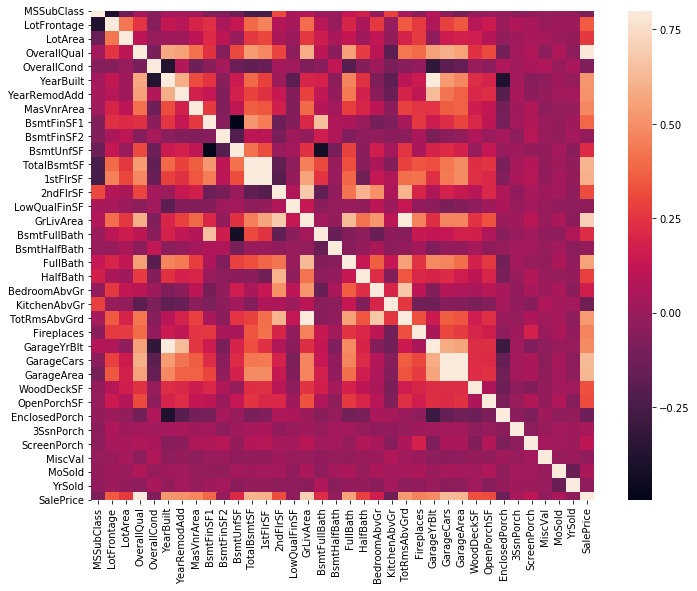

In [13]:
# Gráfico de correlação entre as colunas do dataset train.
fig = corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot_kws=True);

O gráfico de correlação das 10 colunas mais relevantes, mostra quais têm mais relevância para estimar o valor das casas. 

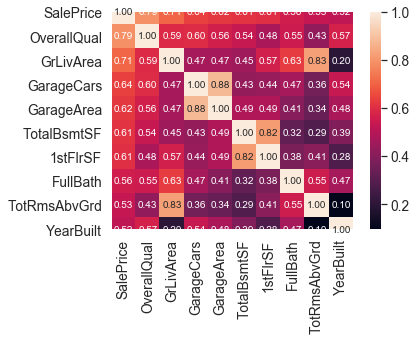

In [39]:
# Gráfico de correlação das 10 colunas mais relevantes.
# plt.figure(figsize=(10,8))
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

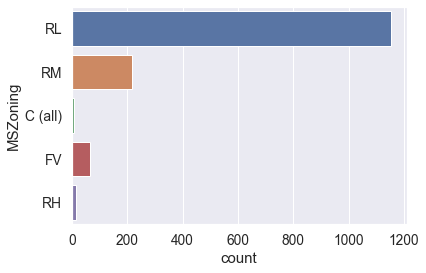

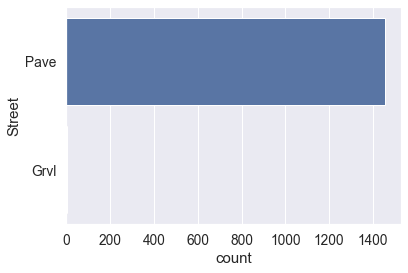

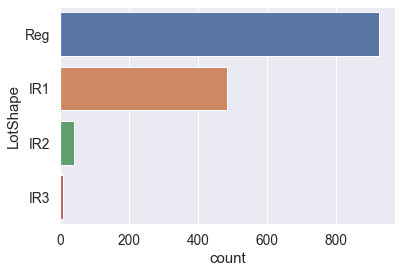

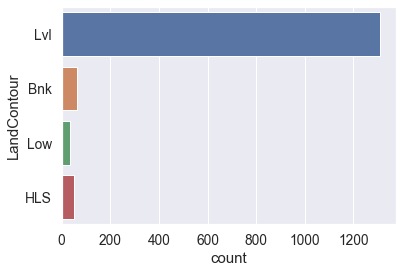

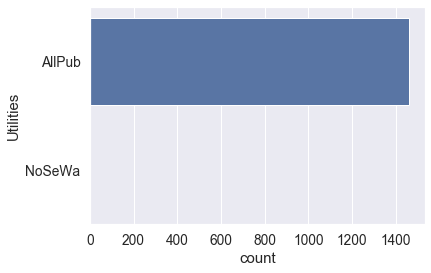

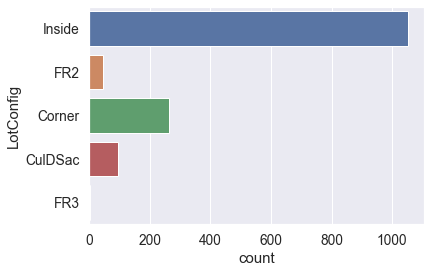

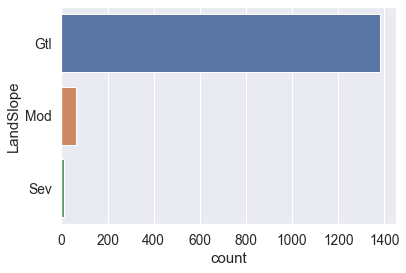

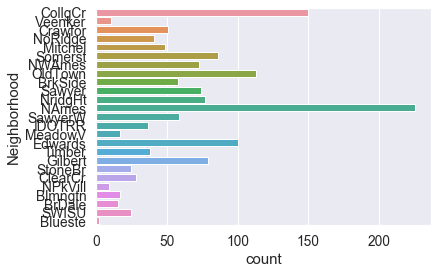

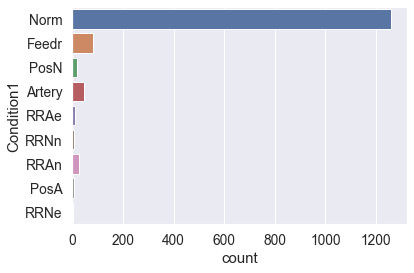

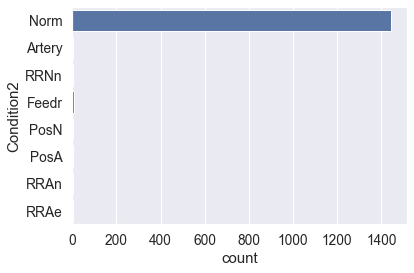

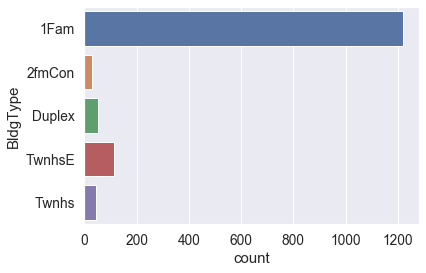

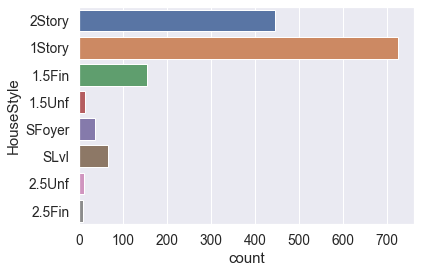

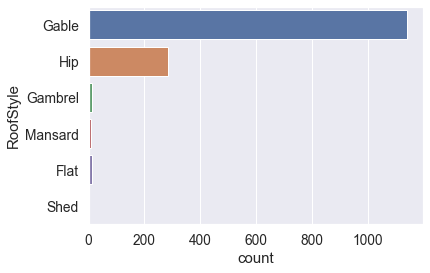

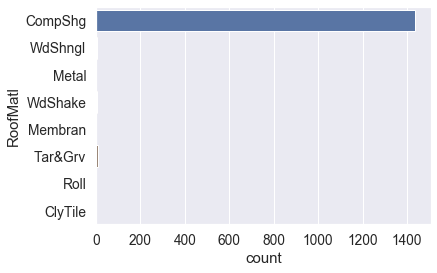

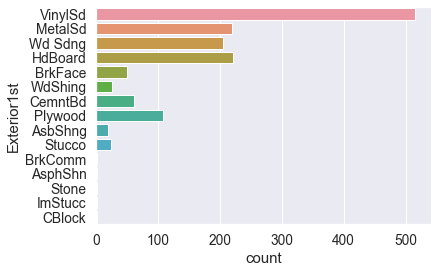

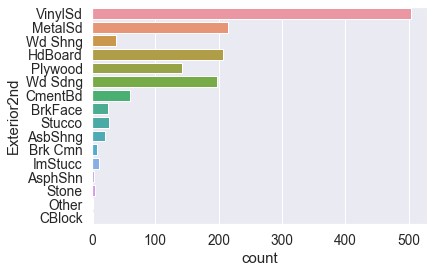

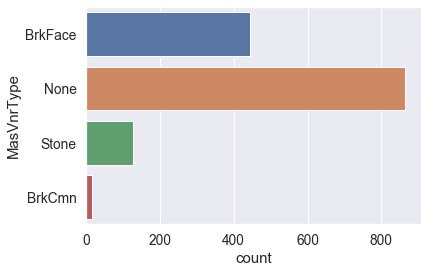

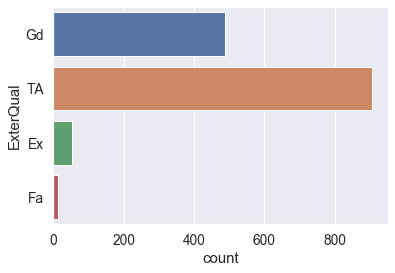

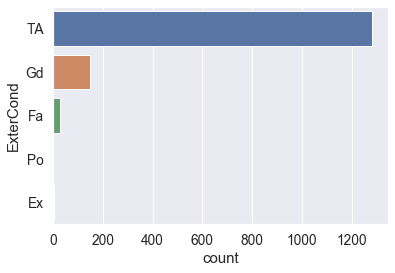

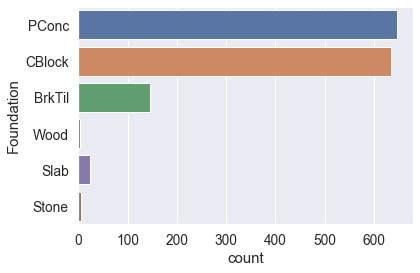

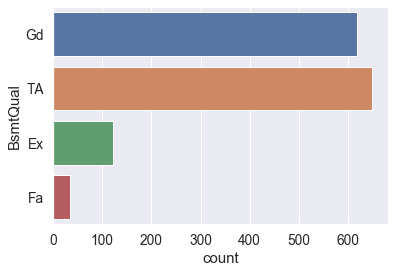

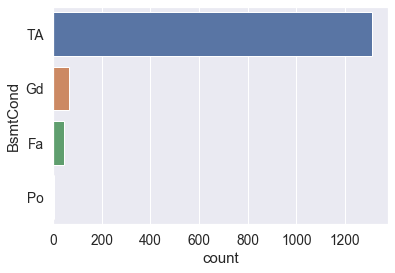

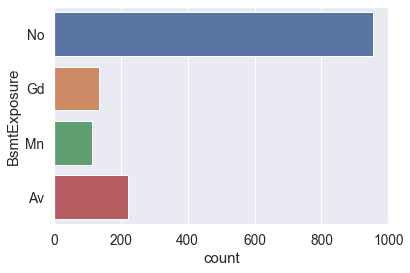

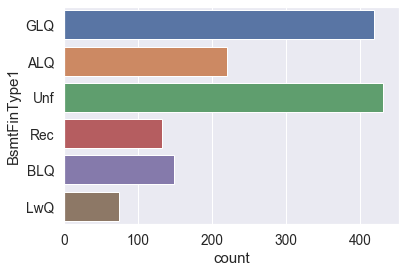

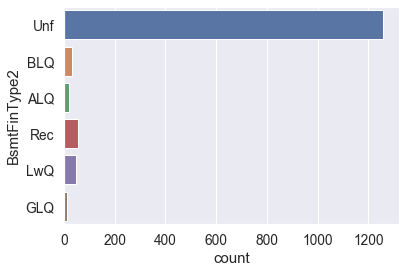

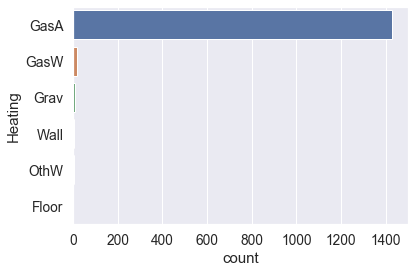

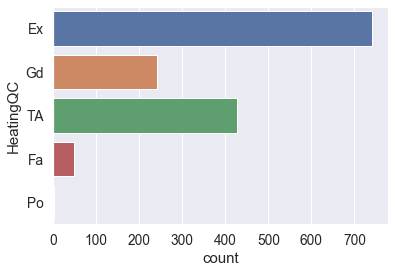

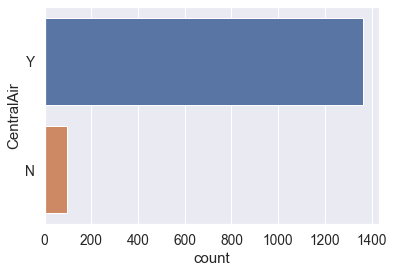

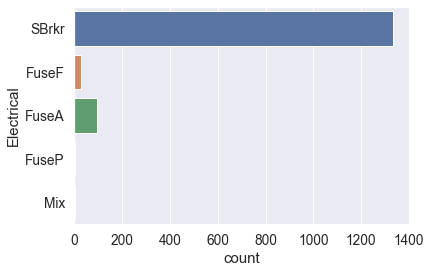

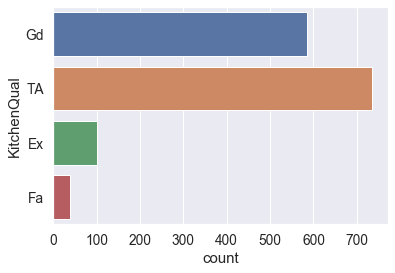

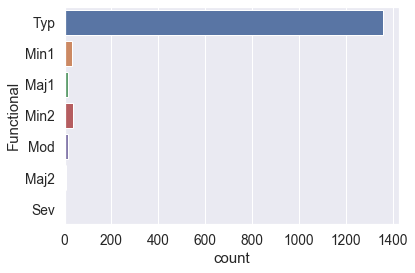

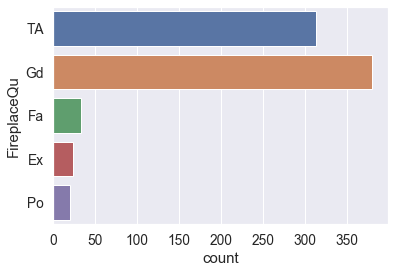

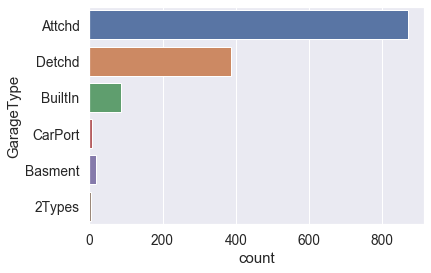

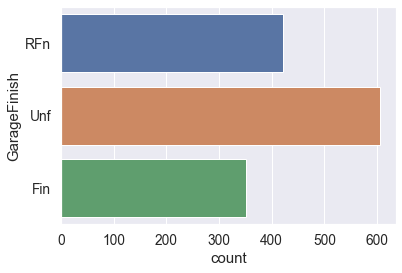

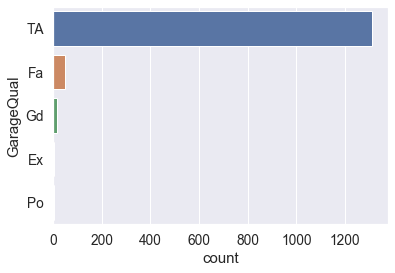

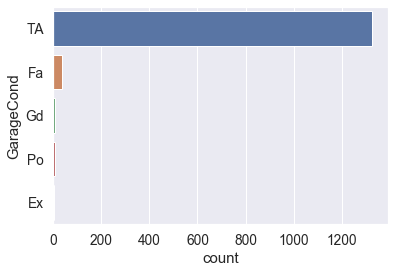

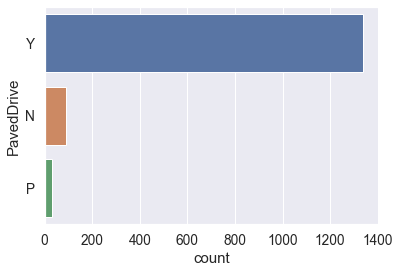

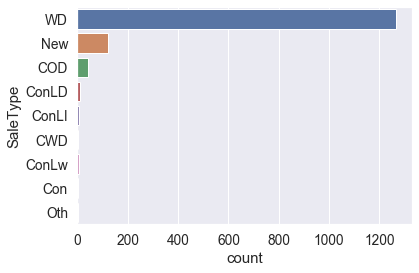

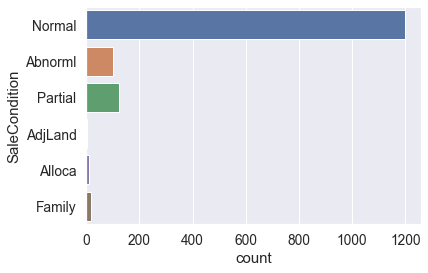

In [20]:
for feature in df_train.dtypes[df_train.dtypes == 'object'].index:
   sns.countplot(y=feature, data=df_train)
   plt.show()

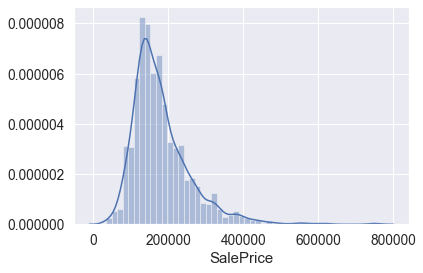

In [22]:
# O Gráfico mostra a frequência dos valores das casas, que estão por volta de 200 mil.
sns.distplot(df_train['SalePrice']);

In [30]:
describe_train = round(df_train.describe())
describe_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,57.0,70.0,10517.0,6.0,6.0,1971.0,1985.0,104.0,444.0,47.0,...,473.0,94.0,47.0,22.0,3.0,15.0,43.0,6.0,2008.0,180921.0
std,42.0,24.0,9981.0,1.0,1.0,30.0,21.0,181.0,456.0,161.0,...,214.0,125.0,66.0,61.0,29.0,56.0,496.0,3.0,1.0,79443.0
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,20.0,59.0,7554.0,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,...,334.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,50.0,69.0,9478.0,6.0,5.0,1973.0,1994.0,0.0,384.0,0.0,...,480.0,0.0,25.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,70.0,80.0,11602.0,7.0,6.0,2000.0,2004.0,166.0,712.0,0.0,...,576.0,168.0,68.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,...,1418.0,857.0,547.0,552.0,508.0,480.0,15500.0,12.0,2010.0,755000.0


In [27]:
df_test = pd.read_csv('test.csv', index_col='Id')

In [31]:
train_nun = df_train.select_dtypes(include=['int', 'float'])

### Dividindo das informações caracteristicas dos dados (X) e as variáveis alvo (y) 

In [60]:
# Definindo as caracteristicas e as vaiáveis alvo. 
y = train_nun['SalePrice']
X = train_nun.drop(['SalePrice', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea'], axis=1)

In [61]:
X.isnull().sum().sum()

0

In [62]:
# Dividindo as informações dos dados em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)

## Treinando um modelo de regressão linear
Dividindo os dados em uma matriz X que contém os recursos para treinar, e uma matriz y com a variável alvo, neste caso, a coluna Preço. 

Arrays X e Y

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lm = LinearRegression()

In [65]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
r2_train = lm.score(X_train, y_train)
r2_test = lm.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.80
R2 no set de teste: 0.82


In [67]:
y_pred = lm.predict(X_test)

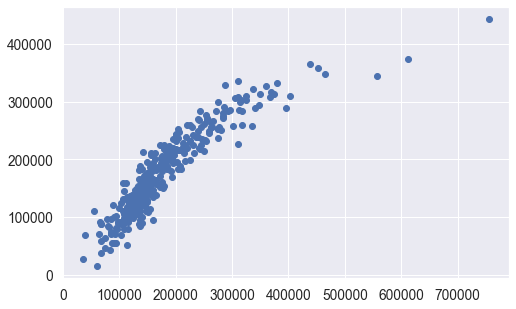

In [73]:
# O Gráfico define a precisao do teste.
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred);

## Avaliação modelo

Modelo para verificar os coeficientes e como podemos interpretá-los.

In [77]:
# Printando a intercepção
print(lm.intercept_)

-635700.6578296764


O que podemos observar nessa avaliação do modelo é que com o aumento de cada unidade dessas listadas abaixo, aumenta ou dimdinui o valor da casa com seus respectivos valores.

In [78]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
MSSubClass,-183.616279
LotArea,0.404522
OverallQual,18539.842747
OverallCond,3409.438774
YearBuilt,332.124696
YearRemodAdd,167.903808
BsmtFinSF1,9.069152
BsmtFinSF2,-4.200729
BsmtUnfSF,0.304526
TotalBsmtSF,5.172950


## Predições do nosso modelo

As previsões do conjunto de testes e ver o quão bem ele prever  os valores.

In [79]:
predictions = lm.predict(X_test)

In [80]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df.head(25)

,Actual,Predicted
Id,,
893,154500,154458.681082
1106,325000,310084.759784
414,115000,114434.243152
523,159000,180272.614466
1037,315500,302257.771381
615,75500,45926.273703
219,311500,225912.383099
1161,146000,151044.107994
650,84500,42971.334983


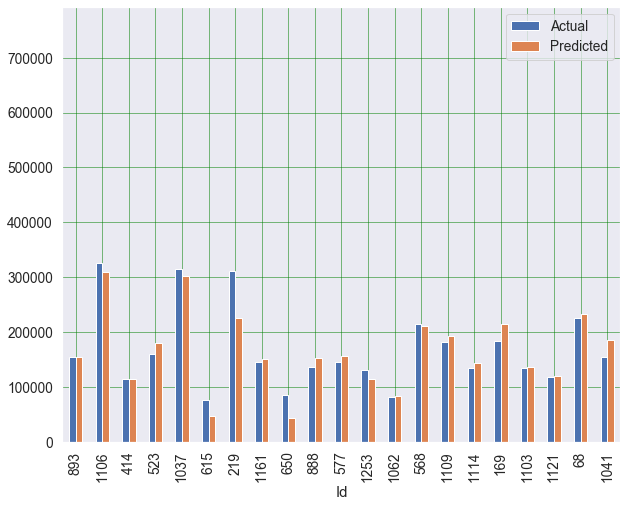

In [89]:
# Esse gráfico mostra a comparação entre os valores atuais e os preditos pela regressão.
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlim(-0.5,20.5)
plt.show()


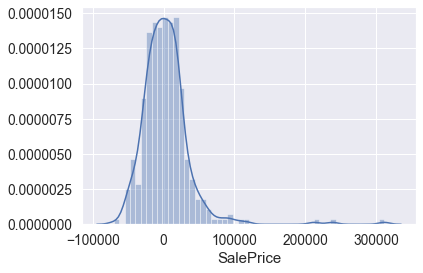

In [84]:
# Os valores reais e os preditos estão proximos
sns.distplot((y_test-predictions),bins=50);